<h1 style="font-family:verdana;"> <center>💨Wind Turbines Object Detection using YOLOv8</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:20px;">

***

<center><img src='https://media1.giphy.com/media/1isbS8fpr9hmO5EIu0/giphy.gif?cid=ecf05e47hvrjbnyz9lmn7v1qoxw9aoj0o2xuyh0eem71q5pm&rid=giphy.gif&ct=s' height=150px width=600px></center>


# 🔬Overview 

<div style="background-color:#d4f1f4; padding: 20px;">
<h2>Problem</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
Wind turbines play a crucial role in producing renewable energy, yet their upkeep and surveillance, particularly in vast wind farms, present difficulties. Conventional methods of manual inspection are not only labor-intensive and costly, but also pose safety risks. Alternatively, unmanned aerial vehicles (UAVs) provide an efficient and safer option for inspecting wind turbines. Nonetheless, processing the data gathered by UAVs demands time and expertise. Automating the analysis through object detection technology could be a viable approach to swiftly and accurately detect faults in wind turbines. Although UAVs offer advantages for inspecting wind turbines, the existing inspection methodology has its drawbacks, being both inefficient and slow. It relies heavily on trained experts to manually evaluate the data captured by the UAVs, creating a bottleneck in the inspection workflow. Manual inspection also poses risks and incurs high costs, particularly under adverse weather conditions or in challenging landscapes. The conventional inspection approach suffers from limited scope, potentially overlooking defects not apparent from ground level. These limitations can lead to decreased energy production and higher maintenance expenses</p>

<h2>Solution</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Implementing object detection technology in the inspection of wind turbines can revolutionize the maintenance and monitoring of wind farms, offering a cost-effective and safe method. By processing the data gathered by UAVs, these algorithms can pinpoint various types of damage on wind turbines, such as cracks or corrosion. This enables early detection and diagnosis of issues before they escalate, enhancing the maintenance efficiency of wind turbines. Moreover, object detection can survey extensive areas, offering a thorough overview of the entire wind farm. The adoption of this technology not only enhances the safety and reliability of wind turbines but also supports the broader use of renewable energy sources.</p>
</div>


<hr>

<center><img src='https://media3.giphy.com/media/fUhpECp6eckkJ6QCUU/giphy.gif?cid=ecf05e47hvrjbnyz9lmn7v1qoxw9aoj0o2xuyh0eem71q5pm&rid=giphy.gif&ct=s' height=200px width=600px></center>



# 🏗️Import Necessary Libraries
---

In [1]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 9.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 19.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import torch

sns.set_style('darkgrid')

%matplotlib inline

# 🗂️Dataset Overview
---

## Visualizing Sample Images with Corresponding Annotations

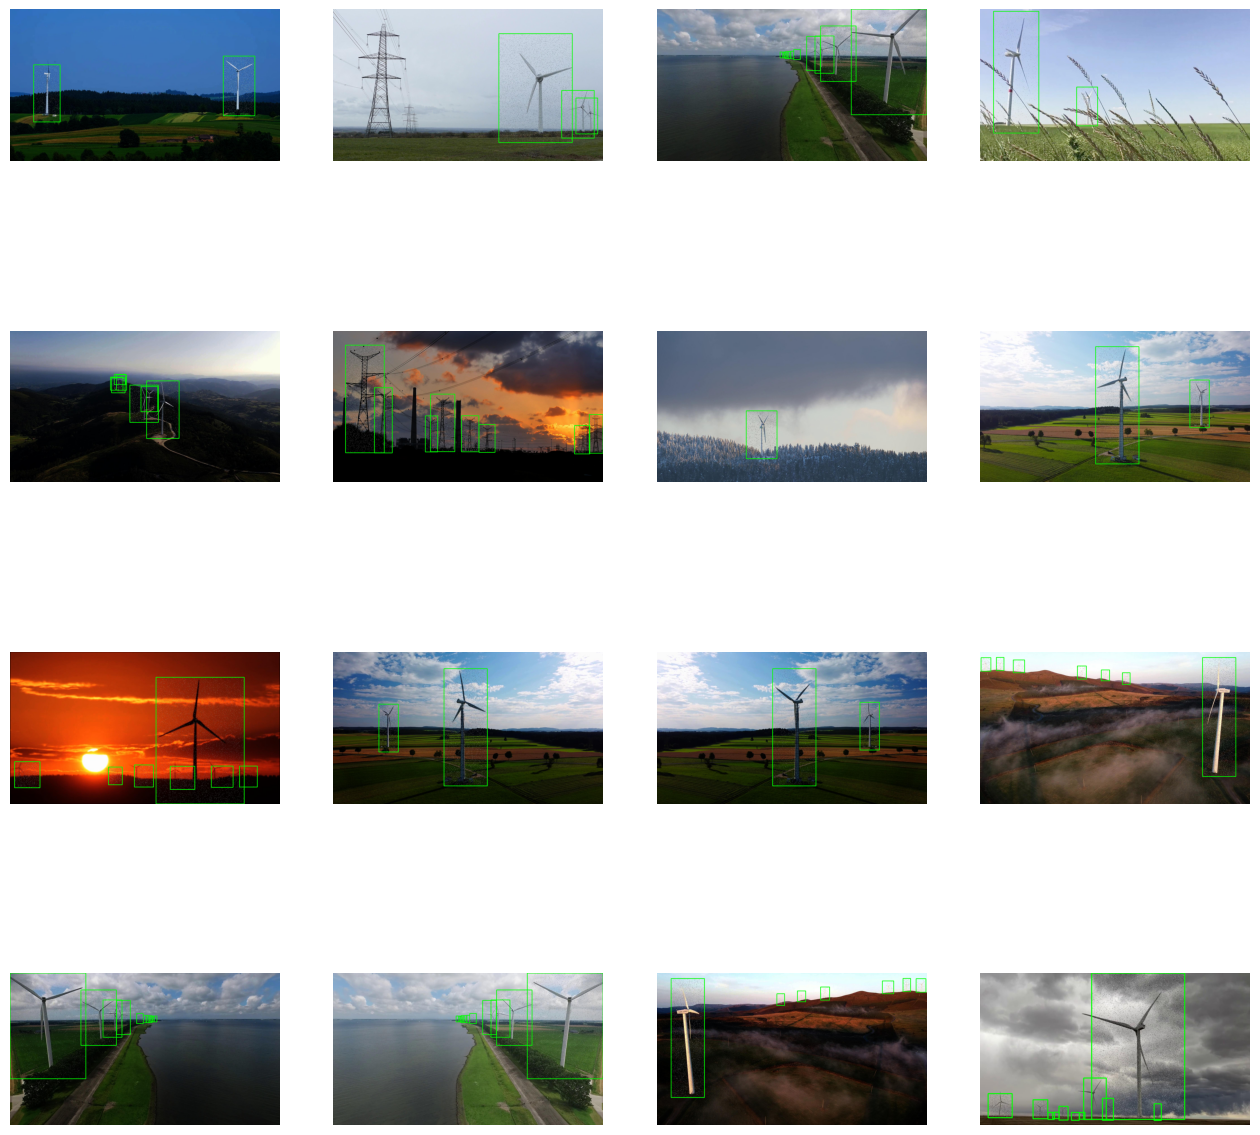

In [3]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/wind-turbine-image-dataset-for-computer-vision/train/images"
train_labels = "/kaggle/input/wind-turbine-image-dataset-for-computer-vision/train/labels"

test_images = "/kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images"
test_labels = "/kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/labels"

val_images = "/kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/images"
val_labels = "/kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

## Image Metadata

In [8]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/wind-turbine-image-dataset-for-computer-vision/train/images/cabletower14_jpg.rf.a8f8c199afaab1ce45e5e799ab802e05.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 1920x1080 and 3 channels.


# 🚀Model Training
---

In [9]:
 # Loading a pretrained model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
model.train(data = '/kaggle/input/wind-turbine-image-dataset-for-computer-vision/data.yaml',
            epochs = 5,
            imgsz = (height, width, channels),
            seed = 42,
            batch = 1,
            workers = 4)

New https://pypi.org/project/ultralytics/8.0.212 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/wind-turbine-image-dataset-for-computer-vision/data.yaml, epochs=5, patience=50, batch=1, imgsz=(1080, 1920, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=1920'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
train: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/train/labels... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:12<00:00, 208.54it/s]
train: WARNING ⚠️ Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:01<00:00, 207.08it/s]
val: WARNING ⚠️ Cache directory /ka

# 📈Model Performance
---
<div style="background-color:#f2f2f2; padding: 20px;">
    
<h2>Train Box Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train box loss metric measures the difference between the predicted bounding boxes and the actual bounding boxes of the objects in the training data. A lower box loss means that the model's predicted bounding boxes more closely align with the actual bounding boxes.</p>
    
<h2>Train Class Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train class loss metric measures the difference between the predicted class probabilities and the actual class labels of the objects in the training data. A lower class loss means that the model's predicted class probabilities more closely align with the actual class labels.</p>

<h2>Train DFL Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train DFL (Dynamic Feature Learning) loss metric measures the difference between the predicted feature maps and the actual feature maps of the objects in the training data. A lower DFL loss means that the model's predicted feature maps more closely align with the actual feature maps.</p>
    
<h2>Metrics Precision (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics precision (B) metric measures the proportion of true positive detections among all the predicted bounding boxes. A higher precision means that the model is better at correctly identifying true positive detections and minimizing false positives.</p>
    
<h2>Metrics Recall (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics recall (B) metric measures the proportion of true positive detections among all the actual bounding boxes. A higher recall means that the model is better at correctly identifying all true positive detections and minimizing false negatives.</p>
    
<h2>Metrics mAP50 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50 (B) metric measures the mean average precision of the model across different object categories, with a 50% intersection-over-union (IoU) threshold. A higher mAP50 means that the model is better at accurately detecting and localizing objects across different categories.</p>
    
<h2>Metrics mAP50-95 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50-95 (B) metric measures the mean average precision of the model across different object categories, with IoU thresholds ranging from 50% to 95%. A higher mAP50-95 means that the model is better at accurately detecting and localizing objects across different categories with a wider range of IoU thresholds.</p>
</div>

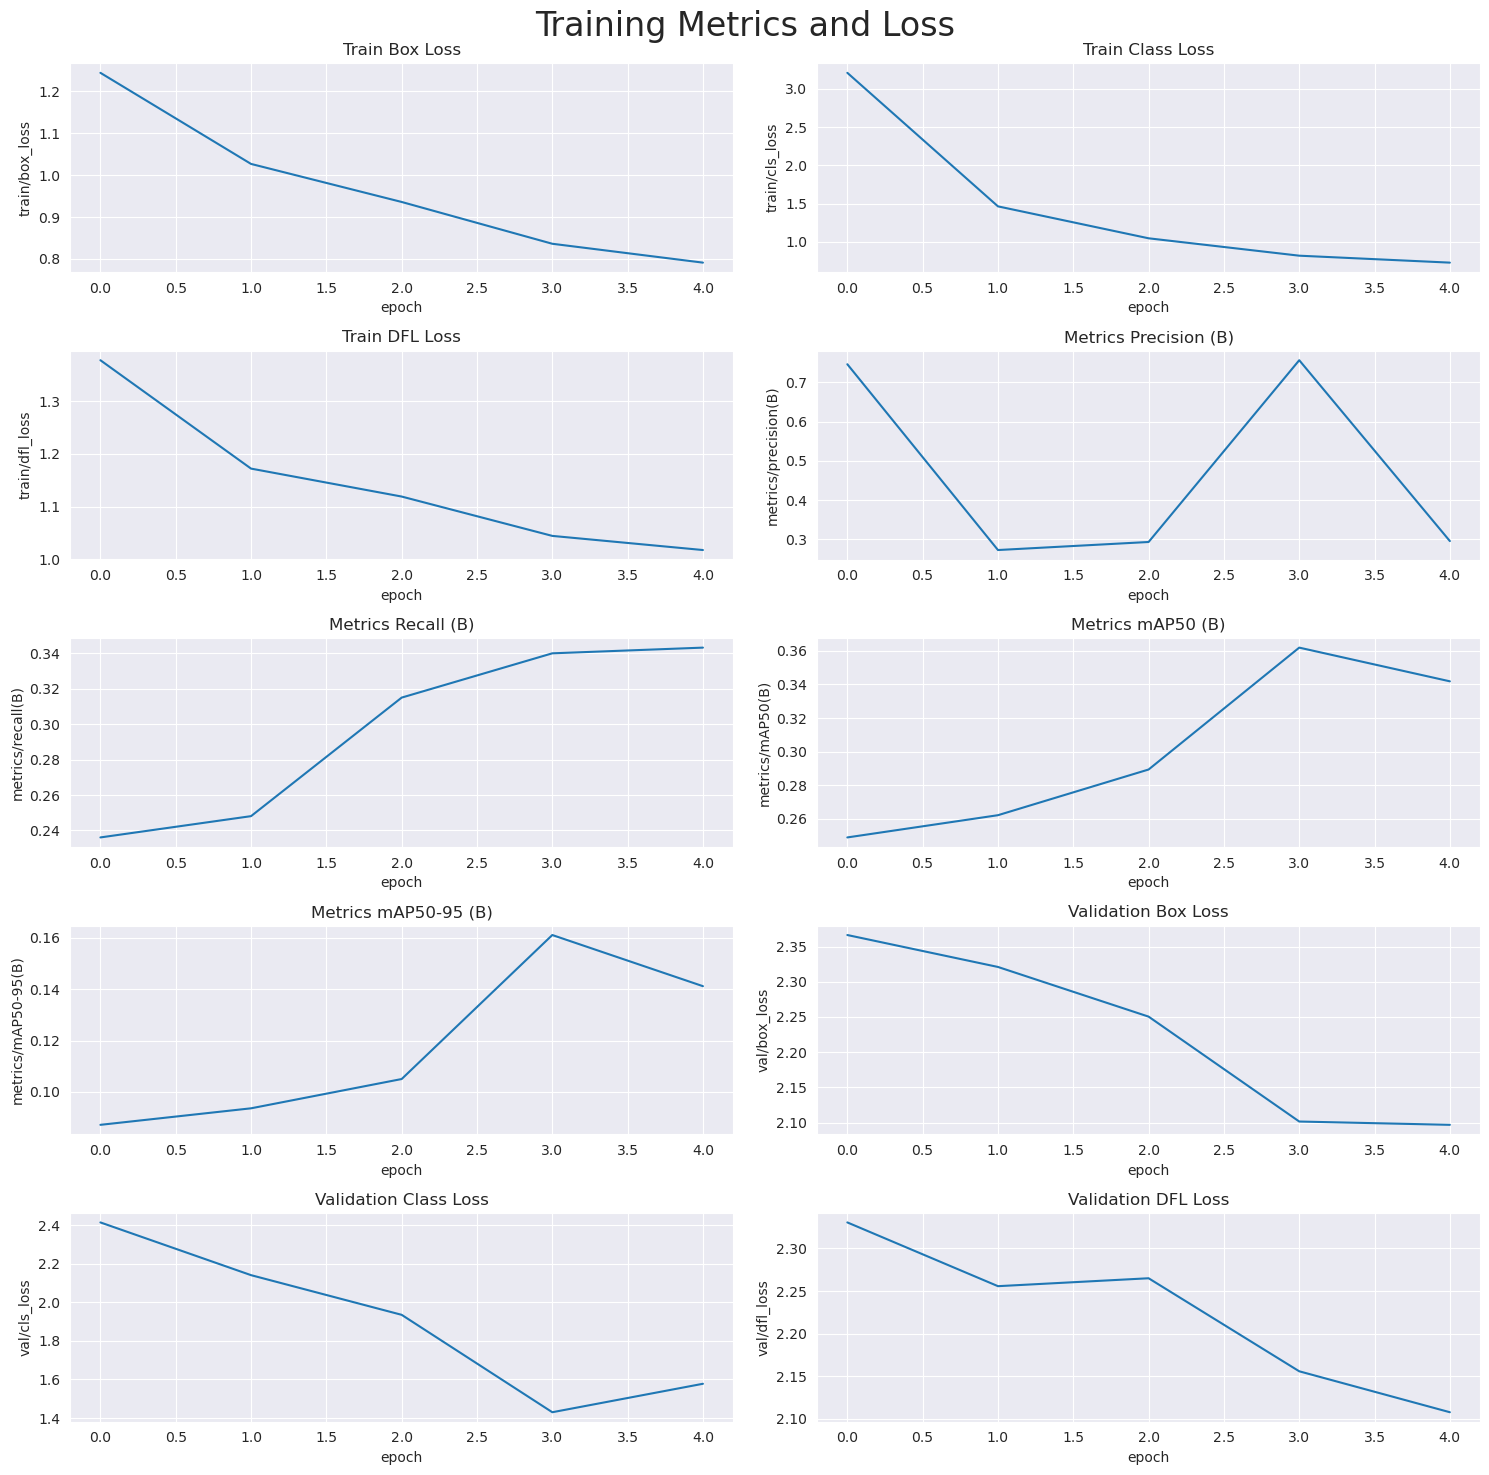

In [10]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


# 📊Evaluation
---

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>mAP Metrics</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Mean Average Precision (mAP) is a popular evaluation metric in object detection, including the YOLO model. It is used to assess the accuracy of an object detection model by measuring how well it can detect objects in an image, as well as the precision of those detections. mAP takes into account both the number of correctly identified objects and the quality of the detections, which means that it is a robust metric for assessing the performance of an object detection model.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">In YOLO, mAP is particularly important because it measures the accuracy of the model in detecting objects of interest. The higher the mAP, the better the model is at identifying objects in an image. Since YOLO is an object detection model designed for real-time applications, achieving high mAP scores is crucial to ensure that the model can accurately detect objects in real-world scenarios. A high mAP score indicates that the model can effectively identify objects and can be used with confidence in real-world applications.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">However, it is worth noting that mAP is not a perfect metric and has its limitations. For example, it does not account for the difficulty of detecting certain types of objects or the importance of different object classes. Nevertheless, it remains a widely used and valuable metric for evaluating object detection models such as YOLO. With its ability to provide a reliable assessment of a model's ability to detect objects, mAP is an essential tool for both researchers and practitioners in the field of computer vision.</p>
</div>

In [11]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/labels... 130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 227.79it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]
                   all        130        752      0.343       0.32      0.339      0.163
           cable tower        130         26          0          0          0          0
               turbine        130        726      0.686      0.639      0.678      0.326
Speed: 15.2ms preprocess, 20.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val


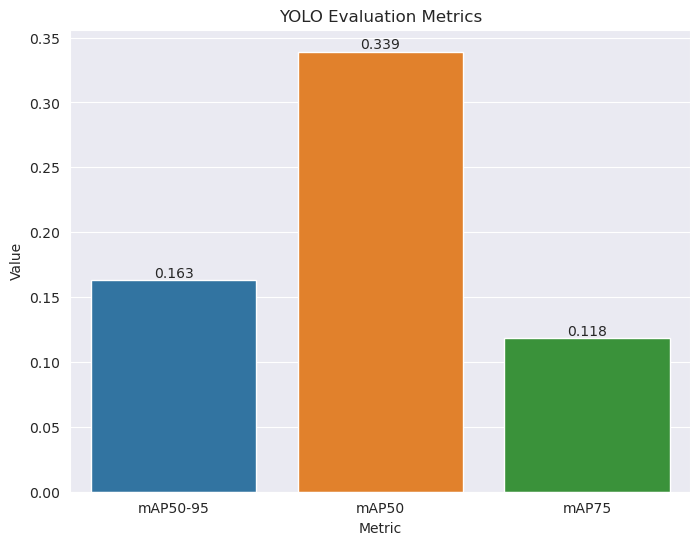

In [12]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>Confusion Matrix</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. In object detection, the confusion matrix can be used to calculate various performance metrics like precision, recall, and F1 score. The confusion matrix is a table that summarizes the true positive, true negative, false positive, and false negative predictions made by the model. In the case of ship detection using YOLO, the confusion matrix can be used to evaluate the model's performance in detecting ships in aerial images.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The rows of the confusion matrix represent the ground truth labels (i.e., the actual presence or absence of a ship in the image), while the columns represent the predicted labels (i.e., the model's prediction of the presence or absence of a ship). The true positives (TP) represent the cases where the model correctly predicts the presence of a ship, while the true negatives (TN) represent the cases where the model correctly predicts the absence of a ship. The false positives (FP) represent the cases where the model incorrectly predicts the presence of a ship when there is none, while the false negatives (FN) represent the cases where the model incorrectly predicts the absence of a ship when there is one. By looking at these values, we can calculate various performance metrics that can help us evaluate the model's performance.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Overall, the confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. By using this tool, we can calculate various performance metrics like precision, recall, and F1 score, which can help us understand how well the model is performing in detecting ships in aerial images. This, in turn, can help us improve the model by identifying areas where it is making mistakes and tweaking the model's architecture and parameters accordingly.</p>
</div>

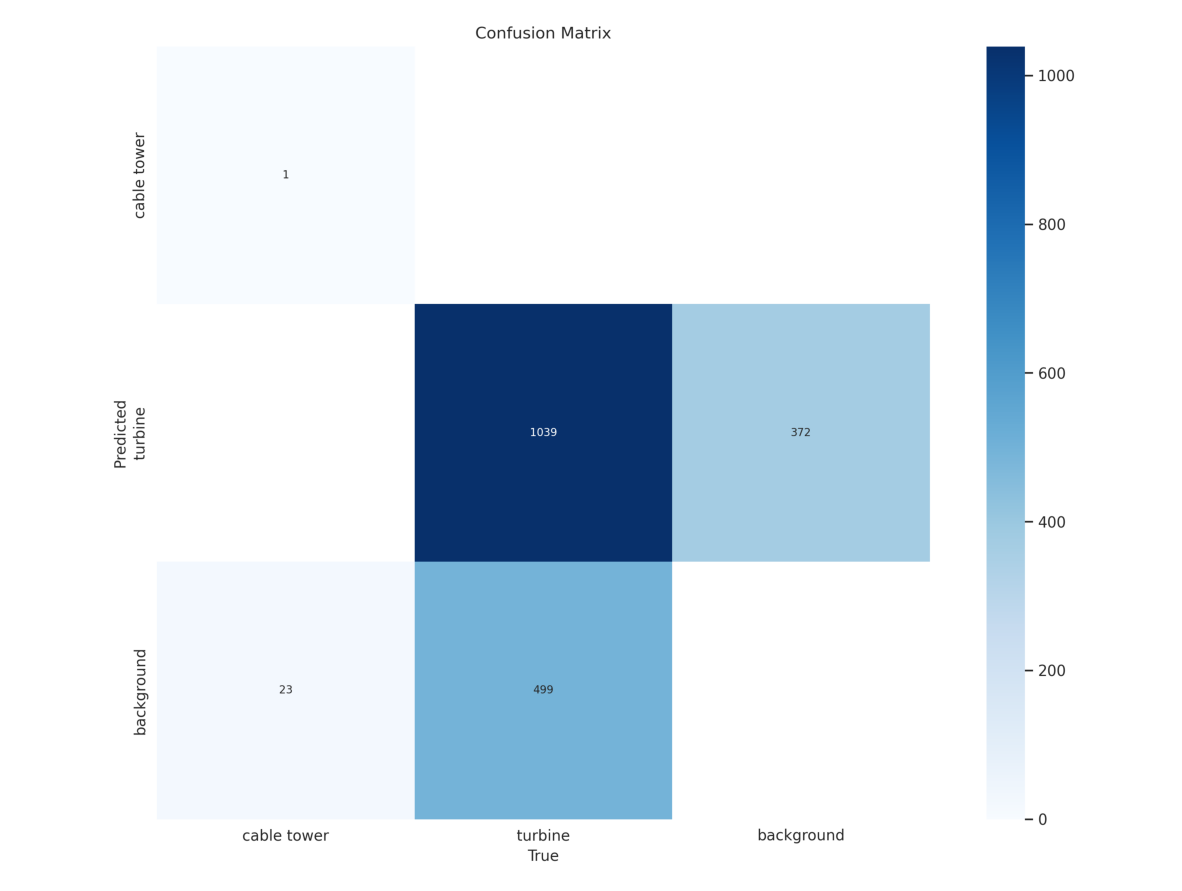

In [13]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# 🔮Making Predictions on Test Images
---

In [16]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 1088x1920 6 turbines, 25.6ms
Speed: 9.7ms preprocess, 25.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 15 turbines, 25.1ms
Speed: 7.3ms preprocess, 25.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 2 turbines, 25.1ms
Speed: 6.9ms preprocess, 25.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1920x1440 1 turbine, 34.5ms
Speed: 18.6ms preprocess, 34.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1440)

0: 1088x1920 1 turbine, 25.6ms
Speed: 9.8ms preprocess, 25.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 2 turbines, 25.1ms
Speed: 7.4ms preprocess, 25.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 2 turbines, 25.3ms
Speed: 6.9ms preprocess, 25.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 10 turbines, 25.1ms
Speed: 7.7ms preprocess, 25.1ms inference,

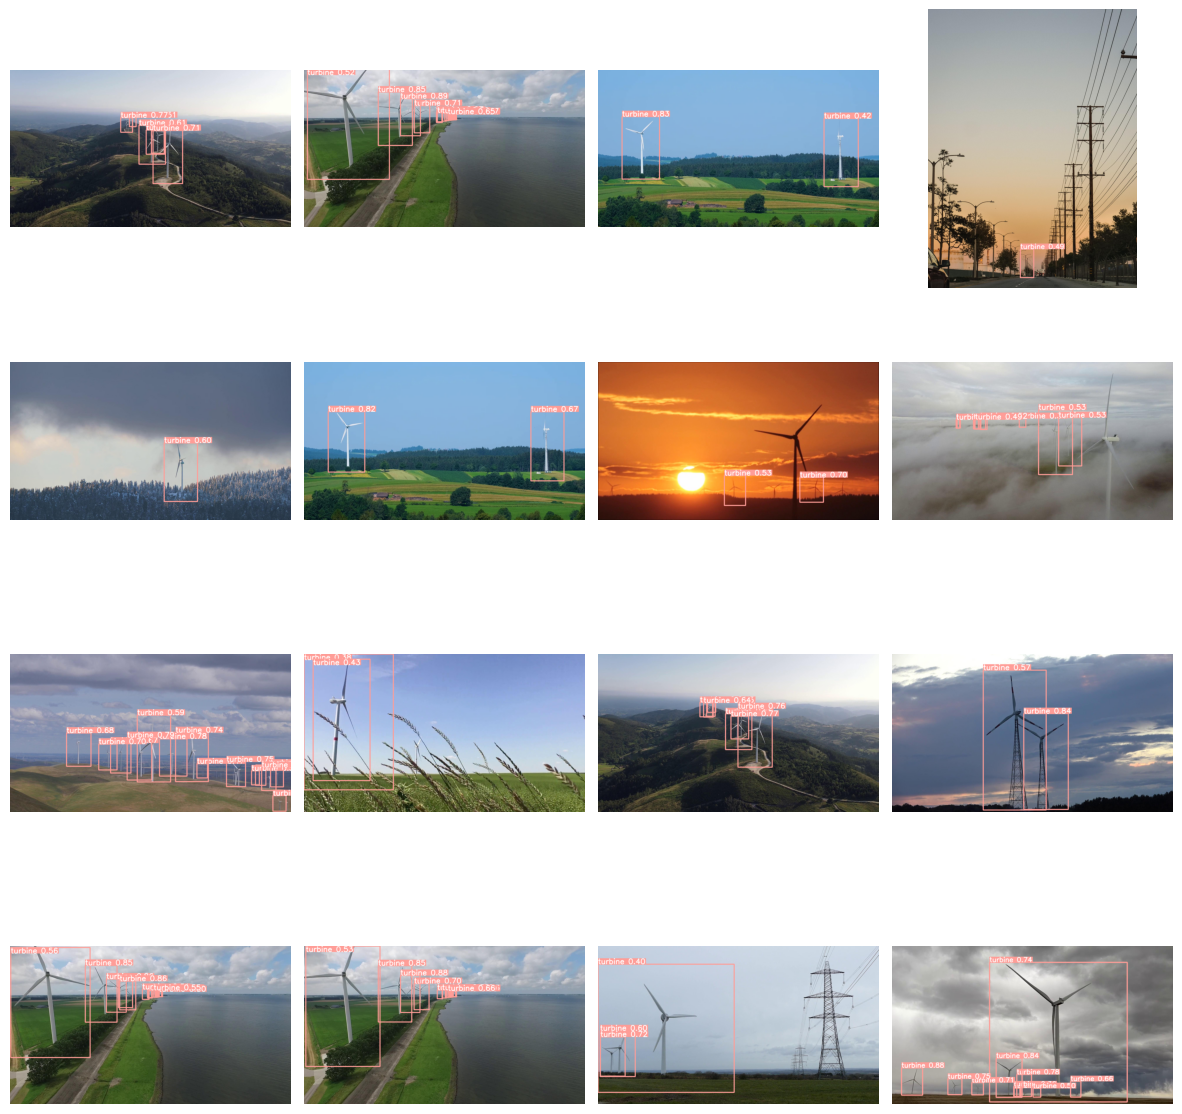

In [17]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
